In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
oil = pd.read_csv(r"..\Data\01_raw\oil.csv")
oil.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [4]:
oil.shape

(1218, 2)

In [5]:
output = []

for column in oil.columns:

    null_values  = np.sum(pd.isna(oil[column]))
    unique = oil[column].nunique()
    column_data_type = oil[column].dtype

    output.append([column, null_values, unique, column_data_type])

output_df = pd.DataFrame(output, columns = ['column','null values', 'unique', 'datatype'])

describe_df = oil.describe().transpose() 
combine_df = pd.concat([ output_df.set_index('column'), describe_df], axis = 1, join='outer')

combine_df

,null values,unique,datatype,count,mean,std,min,25%,50%,75%,max
date,0,1218,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dcoilwtico,43,998,float64,1175.0,67.714366,25.630476,26.19,46.405,53.19,95.66,110.62


In [6]:
oil['dcoilwtico'] = oil['dcoilwtico'].interpolate(method='linear')

In [7]:
np.sum(pd.isna(oil))

c:\Users\User131f\Desktop\Capstone\Capstone-Project\venv\lib\site-packages\numpy\_core\fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


date          0
dcoilwtico    1
dtype: int64

In [8]:
#oil.to_csv(r"C:\Users\User131f\Desktop\Capstone\Capstone-Project\Data\02_intermediate\oil_intermediate.csv")

In [9]:
oil_intermediate = pd.read_csv(r"..\Data\02_intermediate\oil_intermediate.csv")
oil_intermediate.head()

,Unnamed: 0,date,dcoilwtico
0,0,2013-01-01,NaN
1,1,2013-01-02,93.14
2,2,2013-01-03,92.97
3,3,2013-01-04,93.12
4,4,2013-01-07,93.20


In [10]:
oil_intermediate.drop('Unnamed: 0', axis =1, inplace=True)

In [11]:
oil_intermediate.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [12]:
oil.drop_duplicates(inplace=True)

In [13]:
oil.shape

(1218, 2)

<Axes: ylabel='dcoilwtico'>

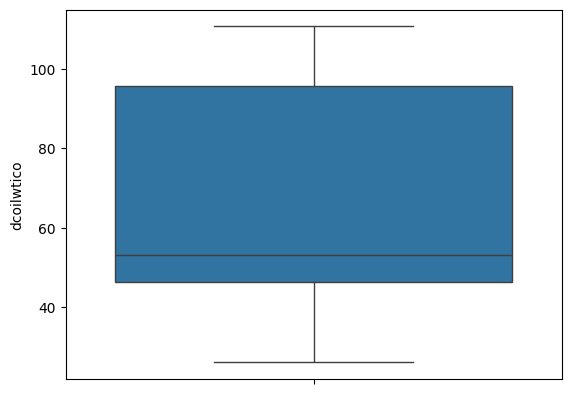

In [14]:
sns.boxplot(y=oil['dcoilwtico'] )

([<matplotlib.axis.XTick at 0x206866efc40>,
 [Text(2013, 0, '2013'),
  Text(2014, 0, '2014'),
  Text(2015, 0, '2015'),
  Text(2016, 0, '2016'),
  Text(2017, 0, '2017')])

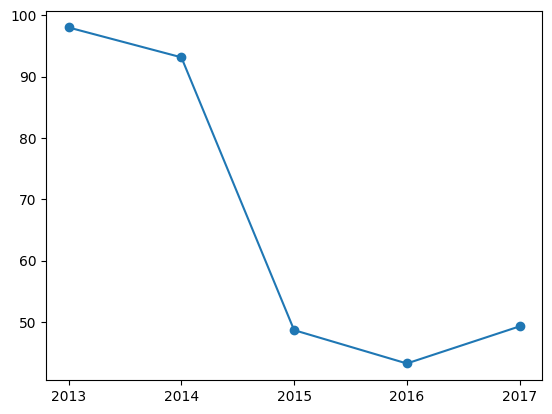

In [15]:
oil_intermediate['year'] = pd.DatetimeIndex(oil_intermediate['date']).year

yearly_data = oil_intermediate.groupby('year')['dcoilwtico'].mean().reset_index()
plt.plot(yearly_data['year'], yearly_data['dcoilwtico'], marker='o')

plt.xticks(range(2013, 2018))

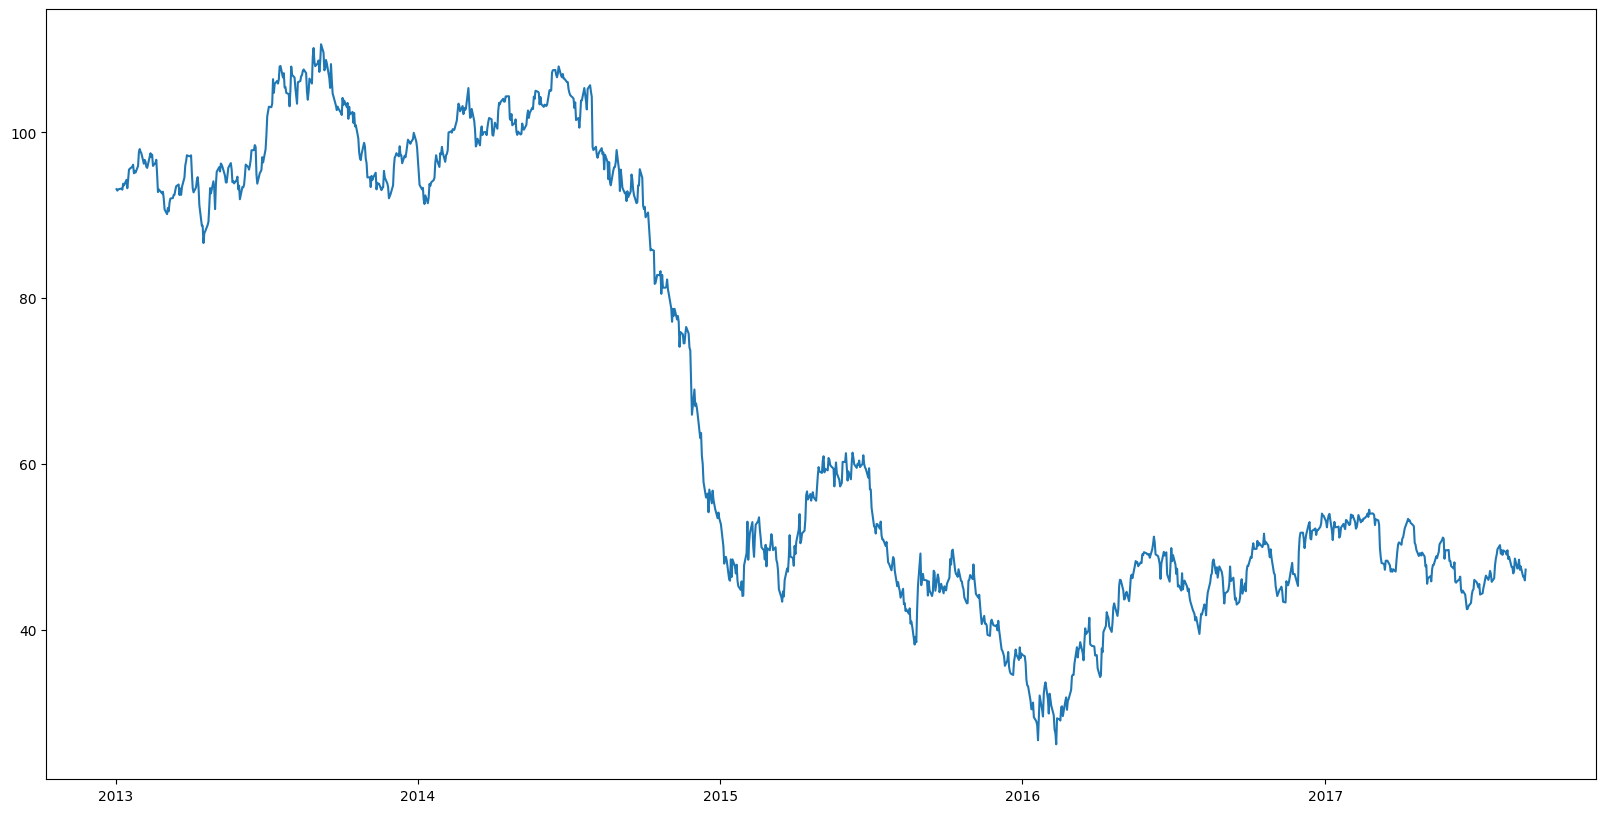

In [25]:
import matplotlib.dates as mdates

oil_intermediate['date'] = pd.to_datetime(oil_intermediate['date'])

plt.figure(figsize=(20, 10))
plt.plot(oil_intermediate['date'], oil_intermediate['dcoilwtico'], linestyle='-')

plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

